In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import technical_analysis.backtest_kz as bt
from data_pipelines.data_manipulation import DataManipulation
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

SYMBOL = 'BTC-USD'
scale = 1
range_list = [5, 10, 15, 20, 25, 30, 40, 50, 99]
range_list = [i*scale for i in range_list]
period = '2y'
interval = '1h'
start_date = ''
end_data = ''
source = 'yahoo'

data = DataManipulation(SYMBOL, source, range_list, period=period, interval=interval, scale=scale, prefix_path='..', saved_to_csv=True)

In [2]:
df = data.df.copy()
df.tail()

,ad,adj_close,adx_10,adx_15,adx_20,adx_25,adx_30,adx_40,adx_5,adx_50,...,wma_15,wma_20,wma_25,wma_30,wma_40,wma_5,wma_50,wma_99,daily_return,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-16 15:00:00+00:00,-283884504884276.1875,16455.7285,35.2193,22.0869,16.9823,13.9498,12.0578,10.3395,74.5496,10.2205,...,16670.2537,16712.0588,16739.0211,16760.6339,16781.3181,16512.6694,16772.6852,16700.3710,-0.0005,1.0000
2022-11-16 16:00:00+00:00,-283884362723497.5000,16521.9688,38.2385,23.4413,17.5459,14.1931,12.1639,10.3530,78.1677,10.2094,...,16641.5025,16687.8196,16717.4736,16741.8834,16767.8433,16500.8677,16764.3254,16697.0796,0.0040,1.0000
2022-11-16 17:00:00+00:00,-283883967859974.4375,16578.9258,38.6761,23.8906,17.6962,14.2091,12.1284,10.2975,70.1803,10.1578,...,16622.5184,16670.3782,16701.7490,16727.5108,16757.2056,16519.8777,16758.2650,16694.9889,0.0034,0.0000
2022-11-16 18:00:00+00:00,-283884038459923.4375,16553.9238,38.2274,23.9947,17.6867,14.1374,12.0385,10.2154,60.2949,10.0906,...,16603.3901,16652.0181,16685.3214,16711.9862,16745.5218,16535.1129,16751.2361,16692.4595,-0.0015,0.0000
2022-11-16 19:00:00+00:00,-283884042396057.6875,16516.7109,38.7242,24.5189,17.9267,14.2283,12.0607,10.1934,56.7655,10.0595,...,16582.9602,16631.6817,16667.3943,16694.6498,16732.2690,16535.7129,16742.6745,16689.2592,-0.0022,0.0000


In [3]:
ext_df = data.extract_features()

In [4]:
ext_df.tail()

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,daily_return,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-16 14:00:00+00:00,0,0,0,0,0,0,1,0,0.3333,0.3333,...,0,0,0,0,0,0,0,0,-0.0034,0.0000
2022-11-16 15:00:00+00:00,0,0,0,0,0,0,1,0,0.3333,0.3333,...,0,0,0,0,0,0,0,0,-0.0005,1.0000
2022-11-16 16:00:00+00:00,1,0,0,0,0,0,1,0,0.3333,0.3333,...,0,0,0,0,0,0,0,0,0.0040,1.0000
2022-11-16 17:00:00+00:00,1,0,0,0,0,0,1,0,0.6667,0.3333,...,1,0,0,0,0,0,0,0,0.0034,0.0000
2022-11-16 18:00:00+00:00,0,0,0,0,0,0,1,0,0.6667,0.6667,...,1,1,0,0,0,0,0,0,-0.0015,0.0000


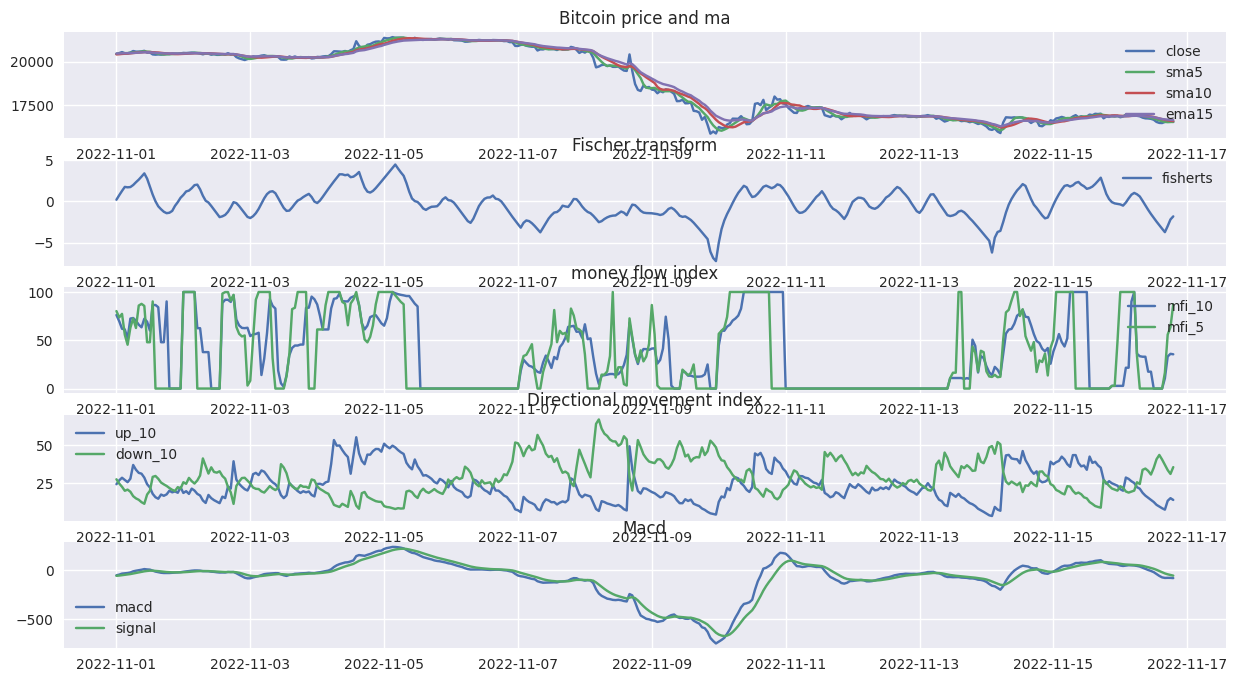

In [5]:
bt.bt_plot_indicators(df['2022-11-01':], 'Bitcoin')

In [6]:
st_fishert_bt = bt.bt_threshold(df['2022-11-01':], 'fishert', 1, -5)

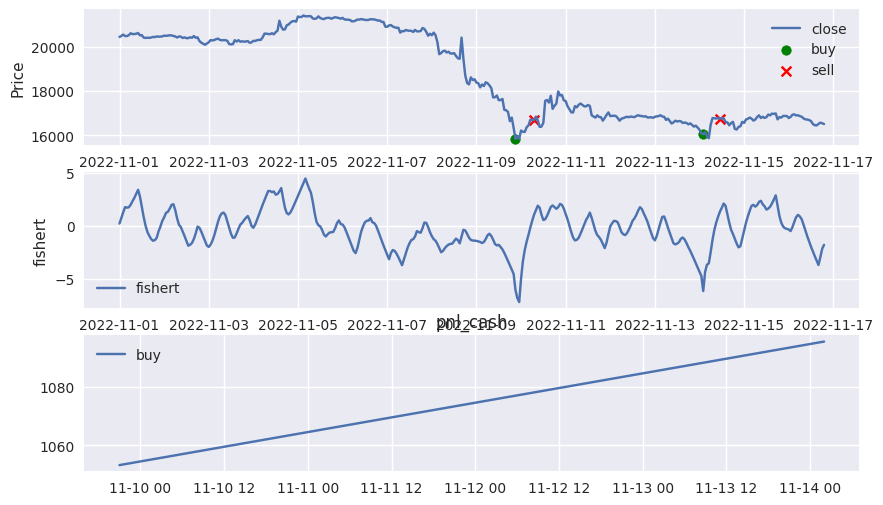

In [7]:
bt.bt_plot_ind(df['2022-11-01':], st_fishert_bt, 'fishert')

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
X = ext_df.copy()
X.reset_index(inplace=True)
X.drop(columns=['Datetime', 'feature_label'], axis=1, inplace=True)
Y = ext_df.feature_label.copy()

In [54]:
Y = Y.reset_index()

In [55]:
Y.drop(columns=['Datetime'], axis=1, inplace=True)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=46)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
pred = model.predict(X_test)
type(pred)

numpy.ndarray

In [15]:
pred = pred > 0.5

In [16]:
pred = pred.astype(int)

In [17]:
accuracy_score(pred, y_test)

0.5164179104477612

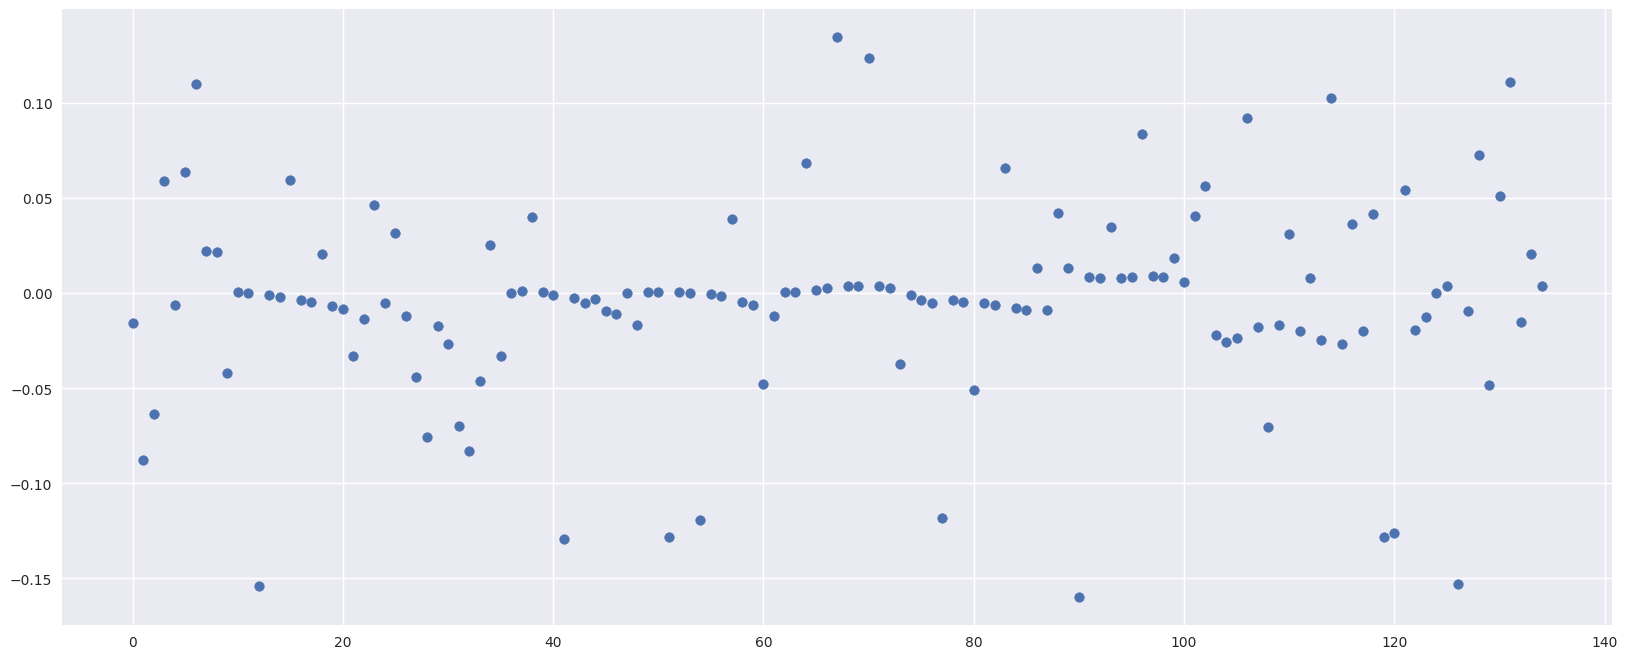

In [18]:
import matplotlib.pyplot as plt
import numpy as np
weigths = model.coef_
fig, ax = plt.subplots(1,1, figsize=(20,8))
plt.scatter(np.arange(0,len(np.column_stack(weigths).ravel())), np.column_stack(weigths).ravel())

In [19]:
np.column_stack(weigths).ravel().size

135

In [27]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [99]:
X_train.shape

(6697, 135)

In [100]:
model = Sequential(
    [               
        tf.keras.Input(shape=(135,)), 
        Dense(units=128, activation='sigmoid'),
        Dense(units=64, activation='sigmoid'),
        Dense(units=16, activation='sigmoid'),
        Dense(units=8, activation='sigmoid'),
        Dense(units=1, activation='sigmoid')
    ], name = "my_model" 
)   

In [101]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               17408     
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 16)                1040      
                                                                 
 dense_31 (Dense)            (None, 8)                 136       
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 26,849
Trainable params: 26,849
Non-trainable params: 0
_________________________________________________________________


In [102]:
[layer1, layer2, layer3, *a] = model.layers

In [103]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (135, 128), b1 shape = (128,)
W2 shape = (128, 64), b2 shape = (64,)
W3 shape = (64, 16), b3 shape = (16,)


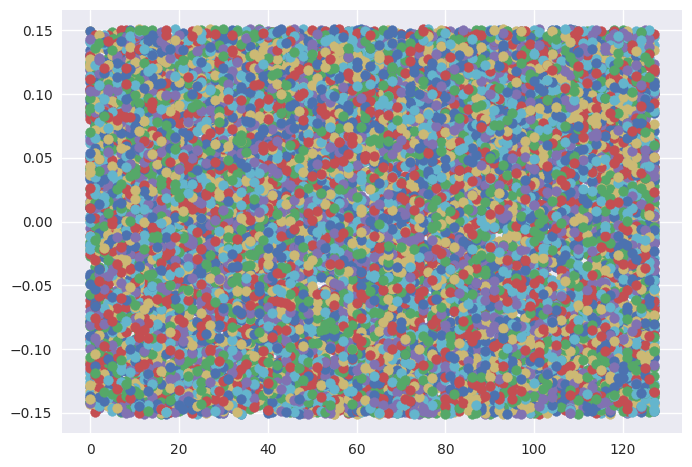

In [117]:
for i in range(W1.shape[0]):
    plt.scatter(np.arange(128), W1[i])

In [104]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train, y_train,
    epochs=30
)

Epoch 1/30
210/210 [==============================] - 1s 4ms/step - loss: 0.6940
Epoch 2/30
210/210 [==============================] - 1s 4ms/step - loss: 0.6931
Epoch 3/30
210/210 [==============================] - 1s 4ms/step - loss: 0.6933
Epoch 4/30
210/210 [==============================] - 1s 4ms/step - loss: 0.6918
Epoch 5/30
210/210 [==============================] - 1s 4ms/step - loss: 0.6920
Epoch 6/30
210/210 [==============================] - 1s 4ms/step - loss: 0.6904
Epoch 7/30
210/210 [==============================] - 1s 5ms/step - loss: 0.6901
Epoch 8/30
210/210 [==============================] - 1s 5ms/step - loss: 0.6901
Epoch 9/30
210/210 [==============================] - 1s 5ms/step - loss: 0.6898
Epoch 10/30
210/210 [==============================] - 1s 4ms/step - loss: 0.6890
Epoch 11/30
210/210 [==============================] - 1s 4ms/step - loss: 0.6889
Epoch 12/30
210/210 [==============================] - 1s 5ms/step - loss: 0.6884
Epoch 13/30
210/210 [====

In [105]:
pred = model.predict(X_test)

53/53 [==============================] - 0s 2ms/step


In [106]:
pred = (pred >= 0.5).astype(int)

In [107]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
14/14 [==============================] - 0s 3ms/step - loss: 0.6976
test loss, test acc: 0.6976248621940613


In [108]:
print(confusion_matrix(y_test, pred))

[[343 489]
 [323 520]]


In [109]:
accuracy_score(y_test, pred)

0.515223880597015

In [110]:
pd.DataFrame(pred).value_counts()

1    1009
0     666
dtype: int64